## Keras Upgrade

In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 23.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
labels = {0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

id = 1375
다음 그림은 Deer 입니다.


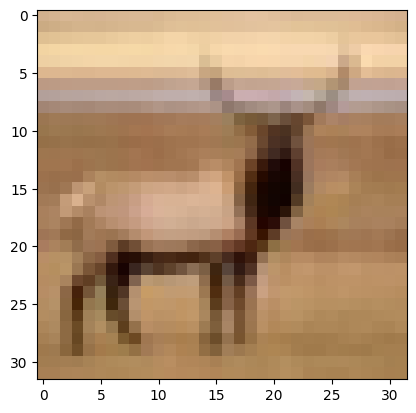

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Transfer Learning

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.backend import clear_session
from keras.layers import Dense
from keras.models import Model
# from keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
clear_session()

resnet50_model = ResNet50(include_top=False,
                          weights='imagenet',
                          input_shape=(32, 32, 3),
                          pooling='avg' # include_top이 False일 때 사용가능. avg면 global average pooling)
)
new_output = Dense(10, activation = 'softmax')(resnet50_model.output)

model = Model(resnet50_model.input, new_output)

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from keras.utils import plot_model

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from keras.optimizers import Adam

In [ ]:
len(model.layers)

177

In [ ]:
for idx, layer in enumerate(model.layers):
    if idx < 150:
        layer.trainable=False
    else:
        layer.trainable=True

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

* Evaluate

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
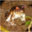

In [ ]:
train_x[0]

In [ ]:
train_y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=3,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                patience=3,
                                 verbose=1,
                                 factor=.5,
                                 min_lr=0.000001)

In [ ]:
model.fit(train_x, train_y, epochs=10000, validation_split=.2, verbose=1, callbacks=[es, lr_reduction])

Epoch 1/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.5024 - loss: 1.6928 - val_accuracy: 0.6095 - val_loss: 1.2107 - learning_rate: 0.0010
Epoch 2/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6553 - loss: 1.1143 - val_accuracy: 0.6209 - val_loss: 1.2906 - learning_rate: 0.0010
Epoch 3/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.7030 - loss: 0.9901 - val_accuracy: 0.6306 - val_loss: 1.1424 - learning_rate: 0.0010
Epoch 4/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7353 - loss: 0.8498 - val_accuracy: 0.6376 - val_loss: 1.2831 - learning_rate: 0.0010
Epoch 5/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7728 - loss: 0.7425 - val_accuracy: 0.6206 - val_loss: 1.4278 - learning_rate: 0.0010
Epoch 6/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8077 - loss: 0.6732
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13

* Inference

In [ ]:
y_pred = model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
len(test_y)

10000

In [ ]:
y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.ravel(test_y)

### Visualize Inference

id = 4835
다음 그림은 Truck 입니다.
모델의 예측 : Truck
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 2.0, 'Truck': 96.0}
정답입니다


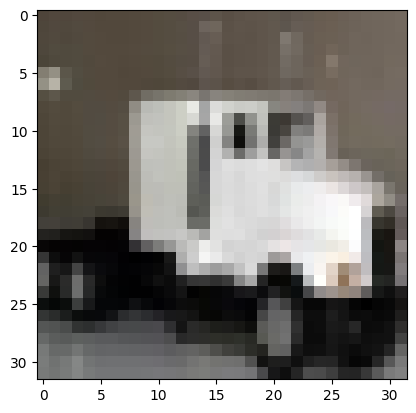

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y_arg[id]]} 입니다.')
print(f'모델의 예측 : {labels[y_pred_arg[id]]}')

prob = np.floor(y_pred[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y_arg[id] == y_pred_arg[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

In [ ]:
print(y_pred_arg)
print(test_y.ravel())

[3 8 8 ... 5 6 7]
[3 8 8 ... 5 1 7]


id = 1487
다음 그림은 Truck 입니다.
모델의 예측 : Automobile
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 63.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 36.0}
틀렸어요


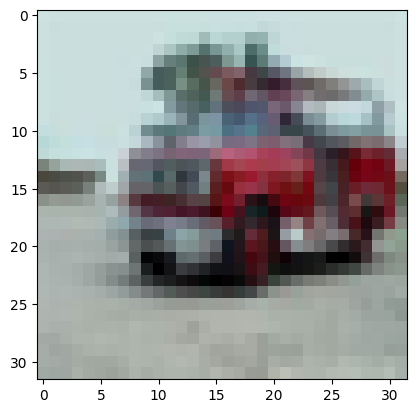

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.ravel() == y_pred_arg)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y_arg[id]]} 입니다.')
print(f'모델의 예측 : {labels[y_pred_arg[id]]}')

prob = np.floor(y_pred[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y_arg[id] == y_pred_arg[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()